<a href="https://colab.research.google.com/github/Blackman9t/Machine_Learning/blob/master/loan_default_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="6">Classification with Python</font></h1>

In this notebook we try to classify bank customers into possible loan-defaulters or non-defaulters using a bunch of classifier algorithms.<br>
We shall use The following algorithms:-<br>
K-Nearest-Neighbour(KNN)<br>
K-Means-Clustering<br>
Decision Trees<br>
Logistic Regression<br>
Support Vector Machines<br>
Random Forest

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [0]:
#@title Default title text
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

The data set we shall use is from Credit One Bank and it's in Kaggle and can be  seen along side its data dictionary via this [link](https://www.kaggle.com/dataforyou/bankloan)<br>
Please open the link above to the data dictionary so that we know exactly what each coded categorical data stands for.

The raw file can be read straight from github via this [link](https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true')

In [0]:
data = 'https://github.com/Blackman9t/Machine_Learning/blob/master/Loan_Data%20for%20Classification.xlsx?raw=true'

Reading the raw file to a data frame and setting row 2 as the header, since I first viewed the file in excel.<br>

Let's define additional NaN values that pandas may not see

In [0]:
additional_nan_values = ['n/a', '--','?','None','Non','non','none']

In [4]:
loan_df = pd.read_excel(data, header=2, na_values=additional_nan_values)

loan_df.head()

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,Other_Debtors_Guarantors,Current_Address_Yrs,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,1


Let's check the shape

In [5]:
loan_df.shape

(5000, 23)

Shape is 5000 rows and 23 columns. <br>Pay attention to the data, it has  a lot of alpha-numeric notations<br>The best bet is to open the data dictionary via this [link](https://www.kaggle.com/dataforyou/bankloan) to a browser so one can understand what each notation stands for.

>>

Let's check the info and dtypes

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Customer_ID                    5000 non-null int64
Status_Checking_Acc            5000 non-null object
Duration_in_Months             5000 non-null int64
Credit_History                 5000 non-null object
Purposre_Credit_Taken          5000 non-null object
Credit_Amount                  5000 non-null int64
Savings_Acc                    5000 non-null object
Years_At_Present_Employment    5000 non-null object
Inst_Rt_Income                 5000 non-null int64
Marital_Status_Gender          5000 non-null object
Other_Debtors_Guarantors       5000 non-null object
Current_Address_Yrs            5000 non-null int64
Property                       5000 non-null object
Age                            5000 non-null int64
Other_Inst_Plans               5000 non-null object
Housing                        5000 non-null object
Num_CC                         5000 non-null int64
Job             

Let's check the stats for columns of object dtype and transpose it for readability

In [7]:
loan_df.describe(include=['object','category']).T

,count,unique,top,freq
Status_Checking_Acc,5000,4,A14,1970
Credit_History,5000,5,A32,2650
Purposre_Credit_Taken,5000,10,A43,1400
Savings_Acc,5000,5,A61,3015
Years_At_Present_Employment,5000,5,A73,1695
Marital_Status_Gender,5000,4,A93,2740
Other_Debtors_Guarantors,5000,3,A101,4535
Property,5000,4,A123,1660
Other_Inst_Plans,5000,3,A143,4070
Housing,5000,3,A152,3565


Now Let's check the stats for numeric  columns  and transpose it for readability

In [8]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_ID,5000.0,102500.500,1443.520003,100001.0,101250.75,102500.5,103750.25,105000.0
Duration_in_Months,5000.0,20.903,12.053989,4.0,12.00,18.0,24.00,72.0
Credit_Amount,5000.0,3271.258,2821.607329,250.0,1365.50,2319.5,3972.25,18424.0
Inst_Rt_Income,5000.0,2.973,1.118267,1.0,2.00,3.0,4.00,4.0
Current_Address_Yrs,5000.0,2.845,1.103276,1.0,2.00,3.0,4.00,4.0
Age,5000.0,35.546,11.370917,19.0,27.00,33.0,42.00,75.0
Num_CC,5000.0,1.407,0.577423,1.0,1.00,1.0,2.00,4.0
Dependents,5000.0,1.155,0.361941,1.0,1.00,1.0,1.00,2.0
Default_On_Payment,5000.0,0.299,0.457866,0.0,0.00,0.0,1.00,1.0
Count,5000.0,1.000,0.000000,1.0,1.00,1.0,1.00,1.0


No missing values atall  as both numeric and object dtype columns have complete 5000 records, but let's just confirm.<br>

I also notice the count column seems to have only 1's in it and no reason why, let's consult the Data Dictionary to find out what it means  and deal with it as we pre-process the Data 

In [18]:
loan_df.isna().any().all()  # checking if any missing values and checking if any true value in the response

False

For a data set of 5000 rows and 23 columns, we may need to reduce it's memory consumption as we know pandas stores all floats as float64 and all int as int64 let's reduce some columns to int8 or int16, especially columns with single or double digit entries like Age

In [10]:
loan_df.dtypes

Customer_ID                     int64
Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
Count                           int64
dtype: object

In [11]:
current_memory = loan_df.memory_usage().sum()
print('Current memory is-', current_memory,'Bytes.')

loan_df.memory_usage()

Current memory is- 920128 Bytes.


Index                            128
Customer_ID                    40000
Status_Checking_Acc            40000
Duration_in_Months             40000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  40000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                 40000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs            40000
Property                       40000
Age                            40000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                         40000
Job                            40000
Dependents                     40000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment             40000
Count                          40000
dtype: int64

In [19]:
# let's change all these columns with a max of 2 digits to int8 to save memory

loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']] = \
loan_df[['Duration_in_Months','Inst_Rt_Income','Current_Address_Yrs','Age','Num_CC','Dependents','Default_On_Payment','Count']].astype('int8')

# Let's change Credit_Amount to 1nt16 and Customer_ID to int32 to save memory

loan_df['Customer_ID'] = loan_df['Customer_ID'].astype('int32')
loan_df['Credit_Amount'] = loan_df['Credit_Amount'].astype('int16')
new_memory = loan_df.memory_usage().sum()
print('New memory is-', new_memory,'Bytes.')

loan_df.memory_usage()

New memory is- 590128 Bytes.


Index                            128
Customer_ID                    20000
Status_Checking_Acc            40000
Duration_in_Months              5000
Credit_History                 40000
Purposre_Credit_Taken          40000
Credit_Amount                  10000
Savings_Acc                    40000
Years_At_Present_Employment    40000
Inst_Rt_Income                  5000
Marital_Status_Gender          40000
Other_Debtors_Guarantors       40000
Current_Address_Yrs             5000
Property                       40000
Age                             5000
Other_Inst_Plans               40000
Housing                        40000
Num_CC                          5000
Job                            40000
Dependents                      5000
Telephone                      40000
Foreign_Worker                 40000
Default_On_Payment              5000
Count                           5000
dtype: int64

Let's see how much memory we have saved

In [20]:
current_memory - new_memory  # We've saved 330,000 Bytes just now.

330000

Next we need to organise the Data into a more logical sequence before we start any computation.<br>
This means we arrange columns of similar meta-data together starting with categorical, then continuous columns.<br>
Except in case where it is more sensible to put a continuous variable before a categorical one.

In [21]:
# Let's see the total columns in the data set

loan_df.columns

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment', 'Count'],
      dtype='object')

Next, let's try to group them into subgroups using python lists. 
<br>
For exanmple we can have a list for bio-data, one for financial date and so on

In [0]:
customer_data = ['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing','Telephone', 'Property','Current_Address_Yrs']

job_and_personal_finance = ['Job', 'Foreign_Worker', 'Years_At_Present_Employment', 'Savings_Acc','Status_Checking_Acc', 'Credit_History']

loan_credit_data = ['Credit_Amount', 'Purposre_Credit_Taken', 'Duration_in_Months','Inst_Rt_Income','Other_Debtors_Guarantors','Other_Inst_Plans ','Num_CC','Default_On_Payment', "Count"]

The above process is highly manual and subject to errors let's confirm we made no errors before assigning the order

In [0]:
# lets concatenate the lists

new_columns = customer_data + job_and_personal_finance + loan_credit_data

Next let's strip off white-spaces either at the beginning or end of all column names, incase we mistakenly left it during the manual process

In [66]:
stripped_columns = [str.strip(x, ' ') for x in new_columns if x[0] or x[-1] == ' '] 
stripped_columns[:5]

['Customer_ID', 'Marital_Status_Gender', 'Age', 'Dependents', 'Housing']

Now let's confirm that all column names in our stripped_column is not different from the default loan_df columns

In [67]:
set(loan_df.columns).difference(set(stripped_columns))

set()

The empty set above indicates no difference. Now we can go ahead and assign the new ordered and stripped off columns to loan_df

In [69]:
loan_df = loan_df[stripped_columns]

# let's see the first few rows
loan_df.head(3)

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,Years_At_Present_Employment,Savings_Acc,Status_Checking_Acc,Credit_History,Credit_Amount,Purposre_Credit_Taken,Duration_in_Months,Inst_Rt_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_CC,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,A75,A65,A11,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,A73,A61,A12,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,A74,A61,A14,A34,2096,A46,12,2,A101,A143,1,0,1


This is beautiful our loan_df columns are ordered in a logical fashion, let's start feature binarization and pre-processing

### First Let's **visualize** The relationships between the categorical variables and Default on payments column (our target variable)

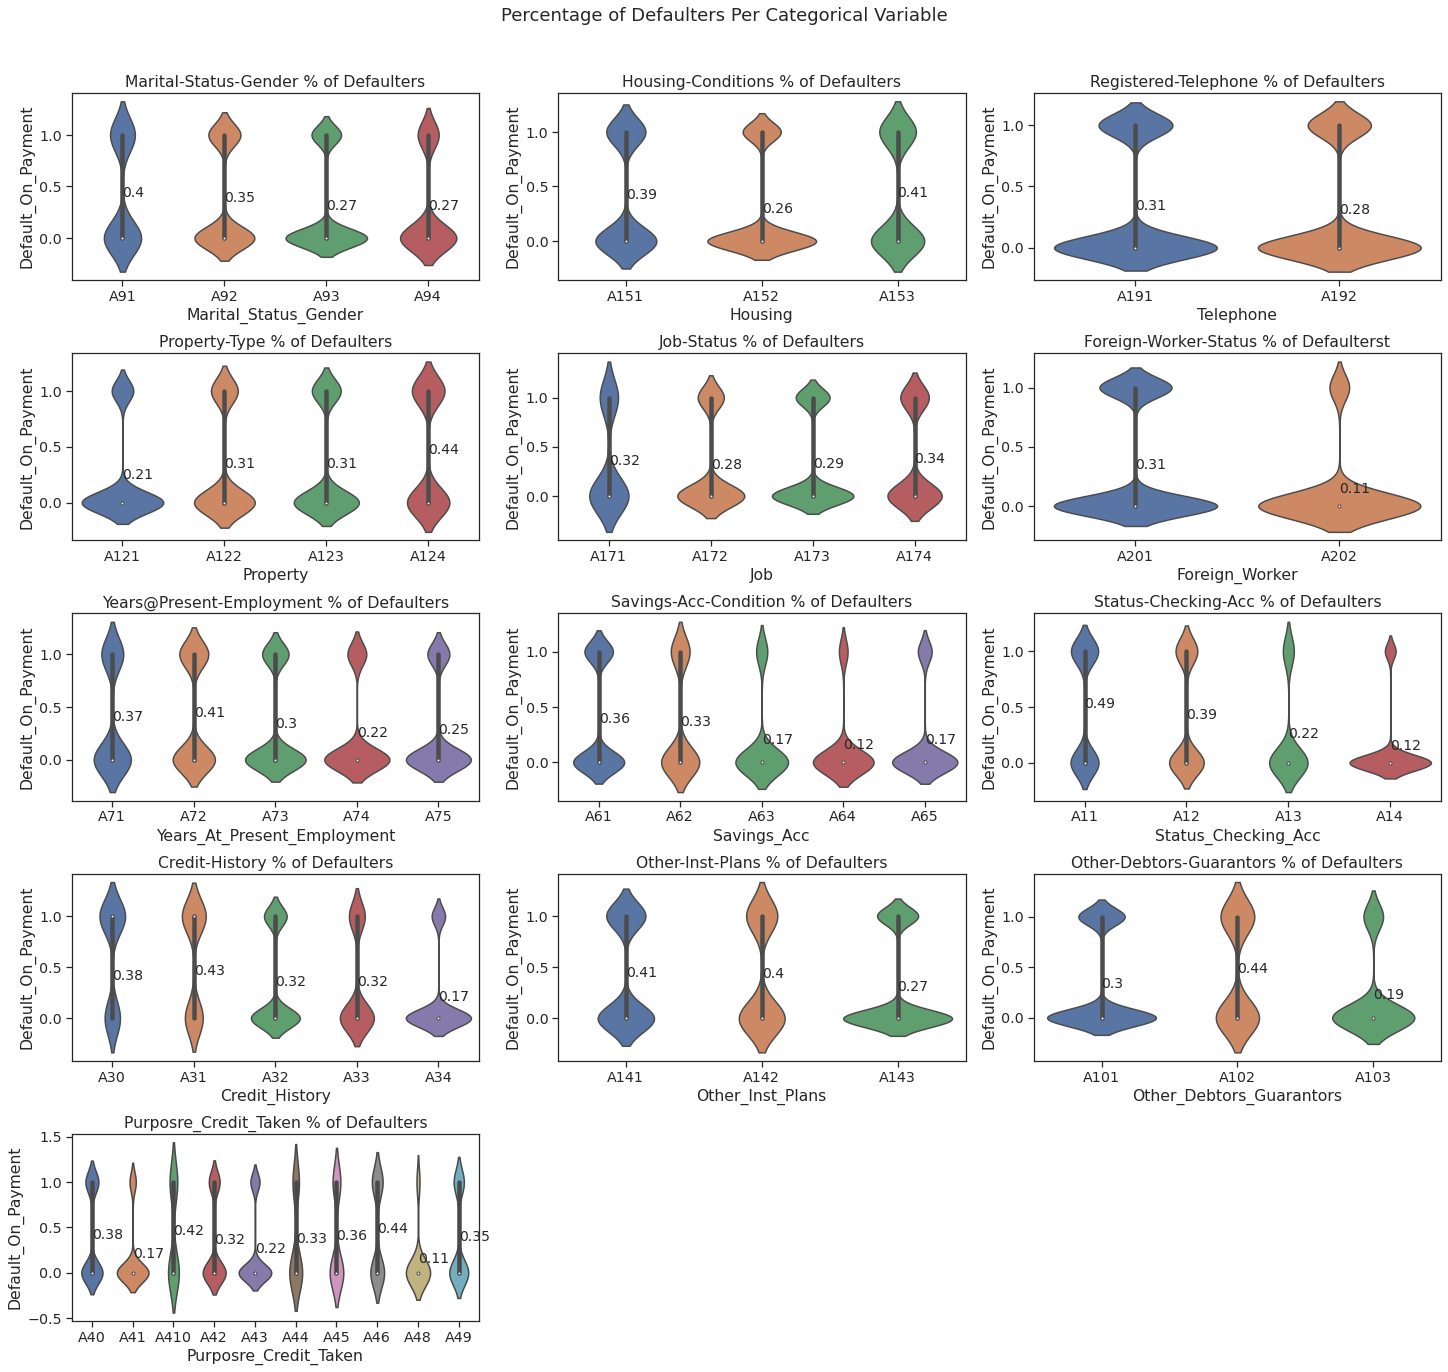

In [95]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(20,18))
sns.set_style('ticks')

specs = gridspec.GridSpec(ncols=3, nrows=5, figure=fig)
ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])
ax3 = fig.add_subplot(specs[0, 2])
ax4 = fig.add_subplot(specs[1, 0])
ax5 = fig.add_subplot(specs[1, 1])
ax6 = fig.add_subplot(specs[1, 2])
ax7 = fig.add_subplot(specs[2, 0])
ax8 = fig.add_subplot(specs[2, 1])
ax9 = fig.add_subplot(specs[2, 2])
ax10 = fig.add_subplot(specs[3, 0])
ax11 = fig.add_subplot(specs[3, 1])
ax12 = fig.add_subplot(specs[3, 2])
ax13 = fig.add_subplot(specs[4, 0])
# ax14 = fig.add_subplot(specs[4, 1])
# ax15 = fig.add_subplot(specs[4, 2])

plt.suptitle('Percentage of Defaulters Per Categorical Variable', fontsize=18, y=1.05)


ax1 = sns.violinplot('Marital_Status_Gender', 'Default_On_Payment', data=loan_df, order=['A91','A92','A93','A94'], ax=ax1)
ax1.set_title('Marital-Status-Gender % of Defaulters')
yposlist = loan_df.groupby(['Marital_Status_Gender'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax1.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax2 = sns.violinplot('Housing', 'Default_On_Payment', data=loan_df, order=['A151','A152','A153'], ax=ax2)
ax2.set_title('Housing-Conditions % of Defaulters')
yposlist = loan_df.groupby(['Housing'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax2.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax3 = sns.violinplot('Telephone', 'Default_On_Payment', data=loan_df,order=['A191','A192'], ax=ax3)
ax3.set_title('Registered-Telephone % of Defaulters')
yposlist = loan_df.groupby(['Telephone'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax3.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax4 = sns.violinplot('Property', 'Default_On_Payment', data=loan_df,order=['A121','A122','A123','A124'], ax=ax4)
ax4.set_title('Property-Type % of Defaulters')
yposlist = loan_df.groupby(['Property'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax4.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax5 = sns.violinplot('Job', 'Default_On_Payment', data=loan_df, order=['A171','A172','A173','A174'], ax=ax5)
ax5.set_title('Job-Status % of Defaulters')
yposlist = loan_df.groupby(['Job'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax5.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax6 = sns.violinplot('Foreign_Worker', 'Default_On_Payment', data=loan_df, ax=ax6)
ax6.set_title('Foreign-Worker-Status % of Defaulterst')
yposlist = loan_df.groupby(['Foreign_Worker'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax6.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax7 = sns.violinplot('Years_At_Present_Employment', 'Default_On_Payment', order=['A71','A72','A73','A74','A75'], data=loan_df, ax=ax7)
ax7.set_title('Years@Present-Employment % of Defaulters')
yposlist = loan_df.groupby(['Years_At_Present_Employment'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax7.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax8 = sns.violinplot('Savings_Acc', 'Default_On_Payment', data=loan_df, order=['A61','A62','A63','A64','A65'], ax=ax8)
ax8.set_title('Savings-Acc-Condition % of Defaulters')
yposlist = loan_df.groupby(['Savings_Acc'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax8.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax9 = sns.violinplot('Status_Checking_Acc', 'Default_On_Payment', data=loan_df,order=['A11','A12','A13','A14'], ax=ax9)
ax9.set_title('Status-Checking-Acc % of Defaulters')
yposlist = loan_df.groupby(['Status_Checking_Acc'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax9.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax10 = sns.violinplot('Credit_History', 'Default_On_Payment', data=loan_df, order=['A30','A31','A32','A33','A34'], ax=ax10)
ax10.set_title('Credit-History % of Defaulters')
yposlist = loan_df.groupby(['Credit_History'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax10.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax11 = sns.violinplot('Other_Inst_Plans', 'Default_On_Payment', data=loan_df,order=['A141','A142','A143'], ax=ax11)
ax11.set_title('Other-Inst-Plans % of Defaulters')
yposlist = loan_df.groupby(['Other_Inst_Plans'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax11.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)


ax12 = sns.violinplot('Other_Debtors_Guarantors', 'Default_On_Payment', data=loan_df, order=['A101','A102','A103'], ax=ax12)
ax12.set_title('Other-Debtors-Guarantors % of Defaulters')
yposlist = loan_df.groupby(['Other_Debtors_Guarantors'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    ax12.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)

ax13 = sns.violinplot('Purposre_Credit_Taken', 'Default_On_Payment', data=loan_df, order=['A40','A41','A410','A42','A43','A44','A45','A46','A48','A49'], ax=ax13)
ax13.set_title('Purposre_Credit_Taken % of Defaulters')
yposlist = loan_df.groupby(['Purposre_Credit_Taken'])['Default_On_Payment'].value_counts(normalize=True).tolist()
yposlist = [round(i,2) for i in yposlist[1::2]]
xposlist = range(len(yposlist))
for i in range(len(yposlist)):
    plt.text(xposlist[i], yposlist[i], str(round(yposlist[i], 2)), fontsize=14)

plt.show()

The essence of visualizing the deafulting percentage of each categorical variable and sub variables is to identify the variables that may be useful for training our model.<br>These variables should not have around 50% chance of defaulting, this shows a weak relationship. Ideally we want variables that have less than 40% or more than 60% chance of defaulting to train our model.<br>

My threshold is <br>

###$defaulting <= 0.4\: or\: >= 0.6$<br>

Thus, I will select only those categorical variables that indicate a defaulting score equal to or larger than 60% or less than or equal to 40%.<br>

Note that for a given variable, a high Non-defaulting Variable score simply indicates  a low-Defaulting Variable score and Vice-Versa

### Feature Binarization

In [96]:
loan_df.head(3)

,Customer_ID,Marital_Status_Gender,Age,Dependents,Housing,Telephone,Property,Current_Address_Yrs,Job,Foreign_Worker,Years_At_Present_Employment,Savings_Acc,Status_Checking_Acc,Credit_History,Credit_Amount,Purposre_Credit_Taken,Duration_in_Months,Inst_Rt_Income,Other_Debtors_Guarantors,Other_Inst_Plans,Num_CC,Default_On_Payment,Count
0,100001,A93,67,1,A152,A192,A121,4,A173,A201,A75,A65,A11,A34,1169,A43,6,4,A101,A143,2,0,1
1,100002,A92,22,1,A152,A191,A121,2,A173,A201,A73,A61,A12,A32,5951,A43,48,2,A101,A143,1,0,1
2,100003,A93,49,2,A152,A191,A121,3,A172,A201,A74,A61,A14,A34,2096,A46,12,2,A101,A143,1,0,1


Let's binarize categorical variables below and save it in a new variable loan_df_dummies

In [97]:
loan_df_dummies = pd.get_dummies(loan_df)
loan_df_dummies.head(3)

,Customer_ID,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Default_On_Payment,Count,Marital_Status_Gender_A91,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Housing_A153,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Property_A124,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A72,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A410,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A46,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A102,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A141,Other_Inst_Plans_A142,Other_Inst_Plans_A143
0,100001,67,1,4,1169,6,4,2,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,100002,22,1,2,5951,48,2,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,100003,49,2,3,2096,12,2,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


Let's see howmany total columns we have in loan_df_dummies

In [98]:
loan_df_dummies.shape  # we now have 64 total columns from 23 of before

(5000, 64)

Now let's select categorical columns whose elements are not  upto 40%  defaulters or above 60% as we visualized earlier

In [99]:
categorical_cols = loan_df.select_dtypes(include ='object').columns
categorical_cols

Index(['Marital_Status_Gender', 'Housing', 'Telephone', 'Property', 'Job',
       'Foreign_Worker', 'Years_At_Present_Employment', 'Savings_Acc',
       'Status_Checking_Acc', 'Credit_History', 'Purposre_Credit_Taken',
       'Other_Debtors_Guarantors', 'Other_Inst_Plans'],
      dtype='object')

Next let's loop through each categorical column and create a list of columns to be deleted whose elements do not show a relatively strong defaulting threshold.

In [135]:
# Let's define a simple column that we can use to sort out the features to delete

def delete_categorical_feature(categorical_cols):
    """ This method takes a pandas index object column and sorts it,
    and returns a list of feature attributes to delete """
    
    delete_list = []
    for x in categorical_cols:
        default_df = loan_df.groupby(x)['Default_On_Payment'].value_counts(normalize=True).to_frame()[1::2]
        delete_feature = default_df[(default_df.Default_On_Payment >= 0.4) & (default_df.Default_On_Payment <= 0.6)]
        delete = [delete_feature.index[i][0] for i in range(len(delete_feature))]
        for i in range(len(delete)):
            delete[i] = x + '_' + delete[i]
        delete_list += delete
    return delete_list

delete_list = delete_categorical_feature(categorical_cols)
print('Total cols to be deleted-', len(delete_list))
delete_list

Total cols to be deleted- 11


['Marital_Status_Gender_A91',
 'Housing_A153',
 'Property_A124',
 'Years_At_Present_Employment_A72',
 'Status_Checking_Acc_A11',
 'Credit_History_A31',
 'Purposre_Credit_Taken_A410',
 'Purposre_Credit_Taken_A46',
 'Other_Debtors_Guarantors_A102',
 'Other_Inst_Plans_A141',
 'Other_Inst_Plans_A142']

Now let's delete the weak relationship cols

In [0]:
loan_df_dummies = loan_df_dummies.drop(delete_list, axis=1)

In [137]:
loan_df_dummies.shape

(5000, 53)

In [138]:
loan_df_dummies.head()

,Customer_ID,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Default_On_Payment,Count,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
0,100001,67,1,4,1169,6,4,2,0,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1,100002,22,1,2,5951,48,2,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
2,100003,49,2,3,2096,12,2,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,100004,45,2,4,7882,42,2,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
4,100005,53,2,4,4870,24,3,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1


Okay so back to the count column, I have checked the Data Dictionary and frankly do not see any mention of it, lemme investigate further

In [139]:
loan_df_dummies.Count.nunique()

# this shows it contains only one unique item which is 1,  5000 times.
# I don't see any use for it and will delete it in the dummies data frame so it is not one of our features

1

Let's drop the Count column as well as the customer Id column

In [140]:
loan_df_dummies.drop(['Count', 'Customer_ID'], axis=1, inplace=True)

# let's confirm that the delete is done.
'Count' in loan_df_dummies.columns

False

Then finally for this phase, let's reposition our target variable to the last column

In [141]:
temp = loan_df_dummies.Default_On_Payment

loan_df_dummies = loan_df_dummies.drop('Default_On_Payment', axis=1)

loan_df_dummies['Default_On_Payment'] = temp

loan_df_dummies.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,45,2,4,7882,42,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,53,2,4,4870,24,3,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1


### How Balanced is our data?

Let's check the ratio of defaulters to non-defaulters in the data set. 

In [142]:
loan_df.Default_On_Payment.value_counts(normalize=True)

0    0.701
1    0.299
Name: Default_On_Payment, dtype: float64

70% of the data set customers do not default and only 30% do.<br>
So we have an imbalanced data set.

An imbalanced Data set is one in which the elements within it are not evenly or fairly arranged.<br>
Just as in this case, we have 70% of elements in Non-default-class and 30% in Default-class.

let's visualize that

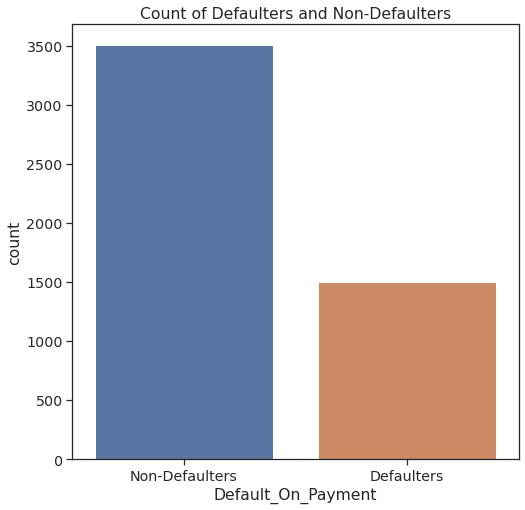

In [143]:
plt.figure(figsize=(8, 8))

x = loan_df_dummies.Default_On_Payment.replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(x)
plt.title('Count of Defaulters and Non-Defaulters')
plt.show()

Let's see the correlation of variables in our data set

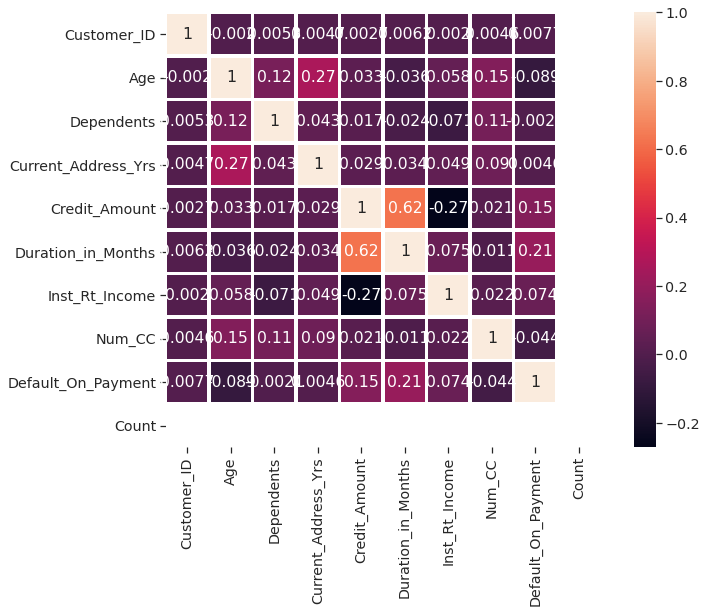

In [144]:
corr_data = loan_df.corr()

# Lets visualize the correlation using a heat map from SNS
plt.figure(figsize=(12,8))
sns.heatmap(corr_data, annot=True, square=True, linewidths=2.5)
plt.show()

### Now Let's balance The Data set by Over-Sampling

We need to balance The Data set because in an imbalanced Data set Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results (that is, when the numbers of observations in different classes vary greatly).<br>
For example, 70% non-defaulters and 30% defaulters, a particular classifier might classify all or most of the observations as Non-defaulters.<br> 
This is due to the classifier or model having a high recognition rate (sensitivity) for the dominant class.<br>
[F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) too, would even be more unreliable in an imbalanced Data set.
See [link](https://en.wikipedia.org/wiki/Confusion_matrix)

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=19, k_neighbors=5)

In [146]:
over_sampled_features, over_sampled_target = sm.fit_resample(loan_df_dummies.drop('Default_On_Payment', axis=1), loan_df_dummies.Default_On_Payment)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [147]:
print('Shape of resampled feature set is:',over_sampled_features.shape)
print('Shape of resampled target data is:',over_sampled_target.shape)

Shape of resampled feature set is: (7010, 50)
Shape of resampled target data is: (7010,)


Let's concat the features and target back into one data frame

In [148]:
over_sampled_features = pd.DataFrame(over_sampled_features)

over_sampled_features['x'] = over_sampled_target

resampled_data = over_sampled_features

resampled_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,x
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0


And let's input the column headers

In [149]:
resampled_data.columns = loan_df_dummies.columns

resampled_data.head()

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,49,2,3,2096,12,2,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,45,2,4,7882,42,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4,53,2,4,4870,24,3,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1


Let's revisualize the resampled target column that shows the number of Defaulters and Non-defaulters

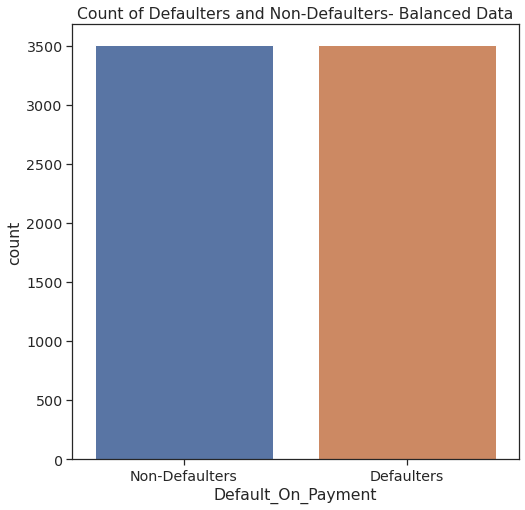

In [150]:
plt.figure(figsize=(8, 8))

x = resampled_data.Default_On_Payment.replace(to_replace=[0, 1], value=['Non-Defaulters','Defaulters'])
sns.countplot(x)
plt.title('Count of Defaulters and Non-Defaulters- Balanced Data')
plt.show()

## Splitting The Data set into Training, Validation and Testing sets


We shall use 70% for training,  15% for validation and 15% reserved only for final testing 

**Let's define the Training sets**

In [151]:
X_train = resampled_data.sample(frac=0.7)

y_train = X_train.Default_On_Payment

X_train.drop('Default_On_Payment', axis=1, inplace=True)

print('X_train shape is:', X_train.shape)
print('y_train shape is:', y_train.shape)

X_train shape is: (4907, 50)
y_train shape is: (4907,)


**Lets define the Validation set**

In [152]:
Spare_set_index_df = resampled_data.iloc[list(set(resampled_data.index).difference(set(X_train.index))),]

print(len(Spare_set_index_df))
Spare_set_index_df.head(3)

2103


,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143,Default_On_Payment
0,67,1,4,1169,6,4,2,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,22,1,2,5951,48,2,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
13,60,1,4,1199,24,4,2,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1


In [153]:
X_val_test = Spare_set_index_df.sample(frac=0.5)
y_val_test = X_val_test.Default_On_Payment

X_val_test.drop('Default_On_Payment', axis=1, inplace=True)

print('X_val_test shape is:', X_val_test.shape)
print('y_val_test shape is:', y_val_test.shape)

X_val_test shape is: (1052, 50)
y_val_test shape is: (1052,)


**Now let's define the Testing set**

In [154]:
X_test_set = resampled_data.iloc[list(Spare_set_index_df.index.difference(X_val_test.index)),]

y_test_set = X_test_set.Default_On_Payment

X_test_set.drop('Default_On_Payment', axis=1, inplace=True)

print('X_test_set shape is:', X_test_set.shape)
print('y_test_set shape is:', y_test_set.shape)

X_test_set shape is: (1051, 50)
y_test_set shape is: (1051,)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## **Feature Normalization**

Let's simply divide each feature element by its max element. This will return a number between 0 and 1 for all features

In [0]:
X_train = X_train / X_train.max()

X_val_test = X_val_test / X_val_test.max()

X_test_set = X_test_set / X_test_set.max()

In [156]:
X_train.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
3075,0.880000,0.5,1.0,0.082827,0.166667,1.00,0.50,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4246,0.693333,0.5,1.0,0.038917,0.166667,1.00,0.75,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6502,0.626667,1.0,1.0,0.684542,0.500000,0.25,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [157]:
X_val_test.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
2687,0.400000,0.5,0.75,0.155341,0.500000,1.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1049,0.373333,0.5,0.50,0.112516,0.166667,1.0,0.25,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6256,0.266667,0.5,0.25,0.036583,0.166667,1.0,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [158]:
X_test_set.head(3)

,Age,Dependents,Current_Address_Yrs,Credit_Amount,Duration_in_Months,Inst_Rt_Income,Num_CC,Marital_Status_Gender_A92,Marital_Status_Gender_A93,Marital_Status_Gender_A94,Housing_A151,Housing_A152,Telephone_A191,Telephone_A192,Property_A121,Property_A122,Property_A123,Job_A171,Job_A172,Job_A173,Job_A174,Foreign_Worker_A201,Foreign_Worker_A202,Years_At_Present_Employment_A71,Years_At_Present_Employment_A73,Years_At_Present_Employment_A74,Years_At_Present_Employment_A75,Savings_Acc_A61,Savings_Acc_A62,Savings_Acc_A63,Savings_Acc_A64,Savings_Acc_A65,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,Purposre_Credit_Taken_A41,Purposre_Credit_Taken_A42,Purposre_Credit_Taken_A43,Purposre_Credit_Taken_A44,Purposre_Credit_Taken_A45,Purposre_Credit_Taken_A48,Purposre_Credit_Taken_A49,Other_Debtors_Guarantors_A101,Other_Debtors_Guarantors_A103,Other_Inst_Plans_A143
13,0.800000,0.5,1.00,0.065078,0.4,1.00,0.50,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
26,0.520000,0.5,1.00,0.023122,0.1,1.00,0.25,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
36,0.413333,0.5,0.75,0.331633,0.8,0.25,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

Let's define a function for plotting and visualizing The Confusion matrix

In [0]:
from sklearn.metrics import classification_report


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Decision Tree Classifier

Let's define a function that returns the best decison tree classifier model and outputs its parameters and  a plot of the confusion matrix

In [0]:
# set max depth range limit for DTree model to iterate through from 1 to 100 to find best parameters
max_depth = 100

def decision_tree_classifier(max_depth, X_train, y_train, X_val_test, y_val_test):
    """Method takes max_depth an int, and X_train and y_train 2D/1D arrays,
    as well as test data x_test and y_test, also arrays, and returns,
    The best max_depth value, from 1 to max_depth, and its best test_accuracy score"""
    
    accuracy_dict={'max_depth':0, 'val_acc':0, 'f1_Score':0, 'log_loss':0}

    
    for i in range(1, max_depth+1):
        # Let's instantiate a model
        decision_model = DecisionTreeClassifier(criterion='entropy', max_depth = i)
        
        # Let's train the model
        decision_model.fit(X_train, y_train)
        
        # Let's make prediction on the test data
        y_hat = decision_model.predict(X_val_test)
        
        # Let's measure accuracy of predictions on test data
        val_accu = round(metrics.accuracy_score(y_val_test, y_hat),4)
        
        # Let's Measure the F1 Score
        val_f1 = round(f1_score(y_val_test, y_hat, average='weighted'),4)
        
        # Let's Measure Logloss
        logloss = round(log_loss(y_val_test, y_hat, normalize=True),4)
        
        if accuracy_dict['val_acc'] < val_accu or accuracy_dict['f1_Score'] < val_f1:
            accuracy_dict['max_depth'] = i
            accuracy_dict['val_acc'] = val_accu
            accuracy_dict['f1_Score'] = val_f1
            accuracy_dict['log_loss'] = logloss
            decision_model2 = decision_model
            
    print('Model Evaluation:')
    print(accuracy_dict)
    
    # Compute confusion matrix
    Dtrees_cnf_matrix = confusion_matrix(y_val_test, y_hat, labels=[1,0])
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plt.figure(figsize=(10, 6))
    sns.set(font_scale=1.3)
    plot_confusion_matrix(Dtrees_cnf_matrix, 
                          classes=['Default=1','Non-Default=0'],
                          normalize= False,  
                          title='Confusion Matrix for Decision-Tree-Classifier')

    return decision_model2

Model Evaluation:
{'max_depth': 17, 'val_acc': 0.9971, 'f1_Score': 0.9971, 'log_loss': 0.0985}
Confusion matrix, without normalization
[[532   4]
 [  0 516]]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

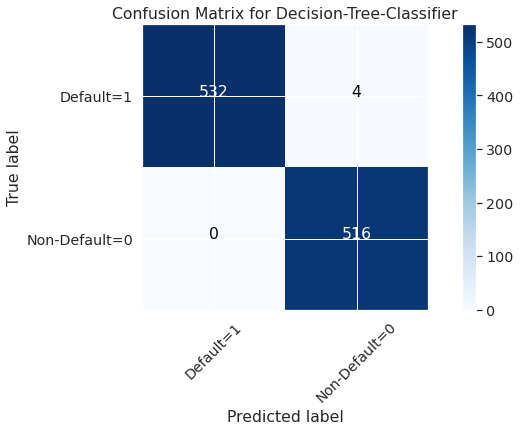

In [162]:
Decision_Tree_Model = decision_tree_classifier(max_depth, X_train, y_train, X_val_test, y_val_test)
Decision_Tree_Model

Notice the following about these metrics:<br>
• The Confusion Matrix shows the number of True Positives and True Negatives (cases
correctly classified) and False Negatives and False Positives (cases incorrectly classified).<br>
• The AUC (Area Under the Curve) is the area under the ROC (Receiver Operator Chart) curve. <br>
A perfect classifier would have an AUC of 1.0, indicating no trade-off between True and False Positive Rates.<br>
• Accuracy is the fraction of cases correctly classified.<br>
• Recall, is the fraction of positive cases correctly classified which is $(TP / (TP + FN))$. Notice this fig is  0.99, or 99 percent accurate.
which means the classifier misclassifies more than 4 of 10 diabetic patients as nondiabetic.<br>
• Precision is the fraction of negative cases correctly classified which is $(TP / (TP + FP))$ which is 0.99 or 99% here.

In [163]:
recall = 514 / (514 + 0)
recall

1.0